In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [62]:
df=pd.read_csv("exercise_data.csv")
df.head()

,Unnamed: 0,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,14733363,NaN,68,190,94,29,105,40.8,231
1,1,14861698,NaN,20,166,60,14,94,40.3,66
2,2,11179863,NaN,69,179,79,5,88,38.7,26
3,3,16180408,NaN,34,179,71,13,100,40.5,71
4,4,17771927,NaN,27,154,58,10,81,39.8,35


In [63]:
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,NaN,68,190,94,29,105,40.8,231
1,14861698,NaN,20,166,60,14,94,40.3,66
2,11179863,NaN,69,179,79,5,88,38.7,26
3,16180408,NaN,34,179,71,13,100,40.5,71
4,17771927,NaN,27,154,58,10,81,39.8,35


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      14948 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [65]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
Calories        int64
dtype: object

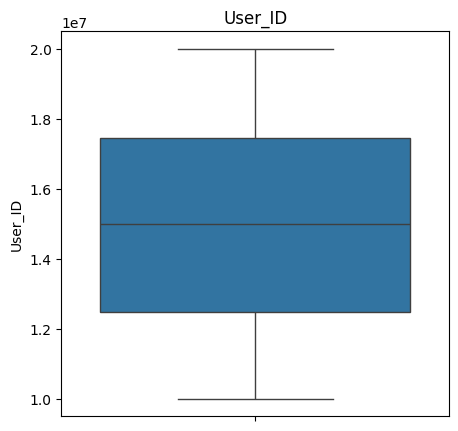

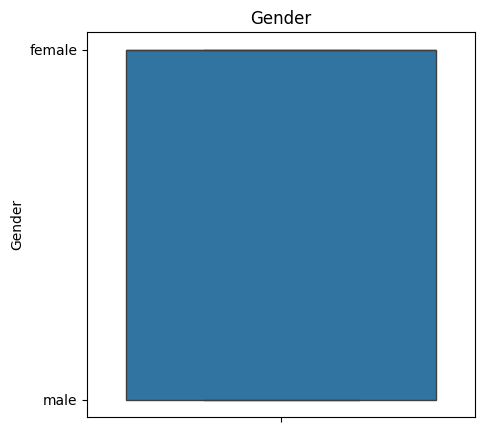

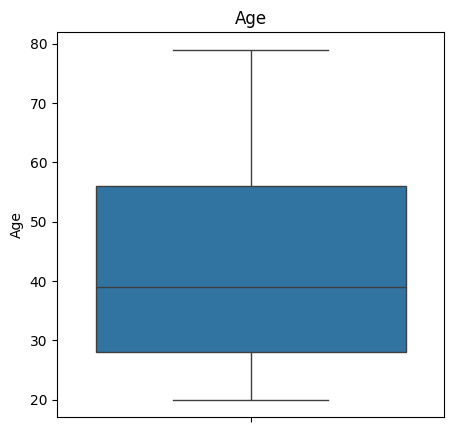

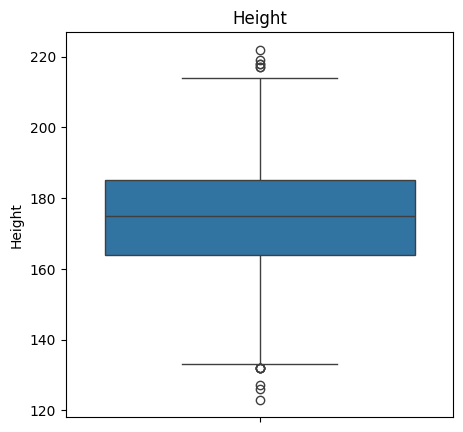

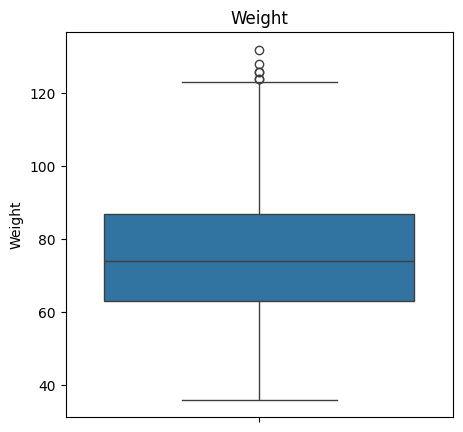

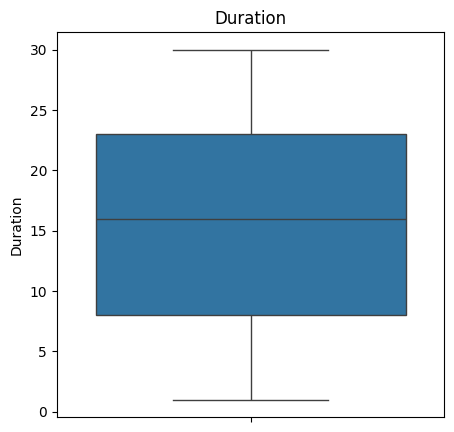

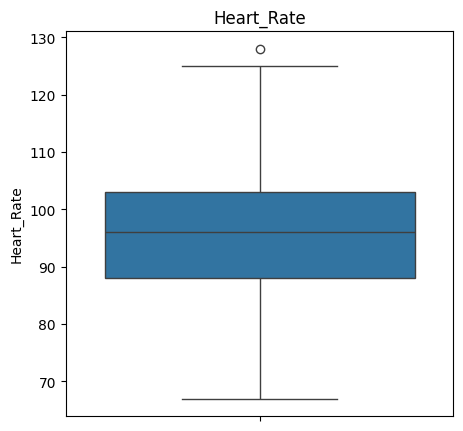

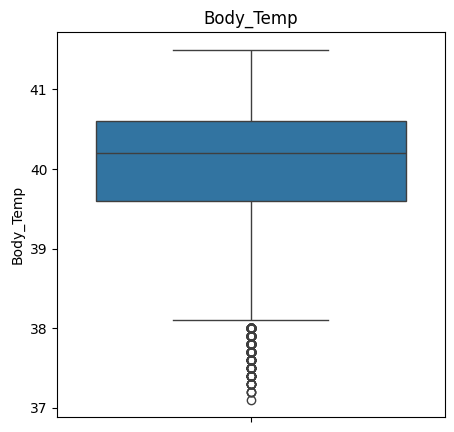

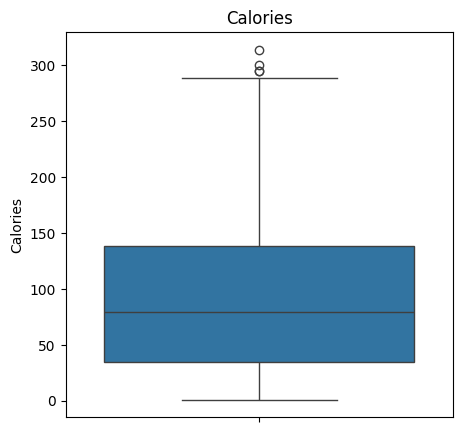

In [66]:

for column in df:
    plt.figure(figsize=(5, 5))
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

<ipython-input-67-69b7e6b8b2fc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Body_Temp'])


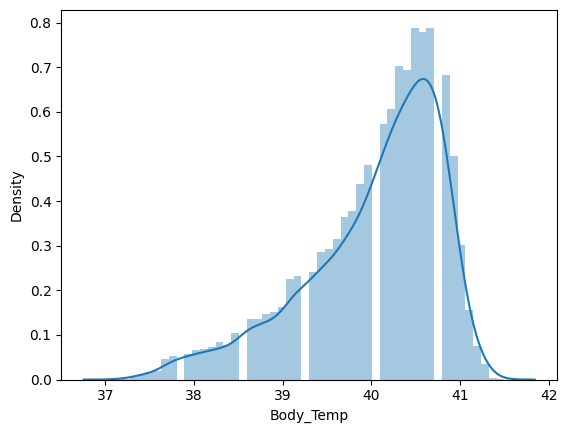

In [67]:

sns.distplot(df['Body_Temp'])
plt.show()


<Axes: xlabel='Body_Temp'>

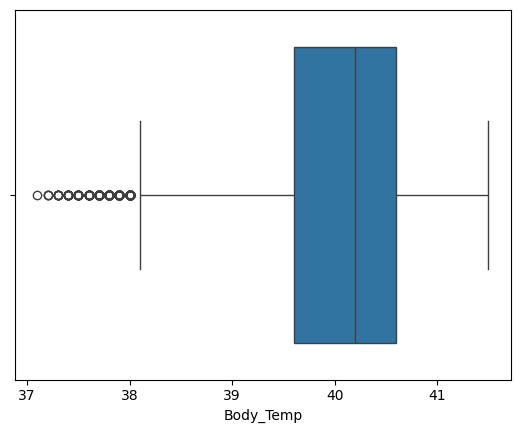

In [68]:
sns.boxplot(df['Body_Temp'],orient='h')

<Axes: xlabel='Body_Temp'>

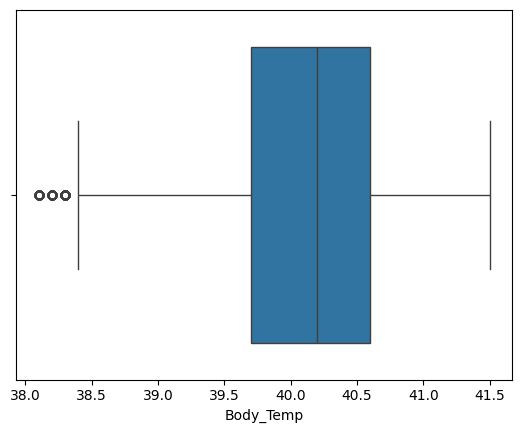

In [69]:
Q1 = df['Body_Temp'].quantile(0.25)
Q3 = df['Body_Temp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Body_Temp'] >= lower_bound) & (df['Body_Temp'] <= upper_bound)]
sns.boxplot(x=df['Body_Temp'])

<ipython-input-70-4ac798270685>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


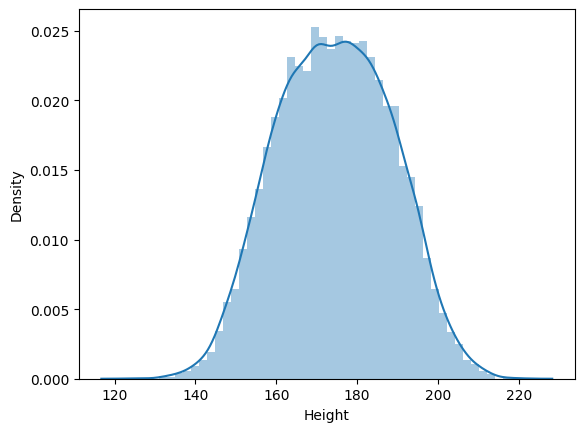

In [70]:

sns.distplot(df['Height'])
plt.show()


<Axes: xlabel='Height'>

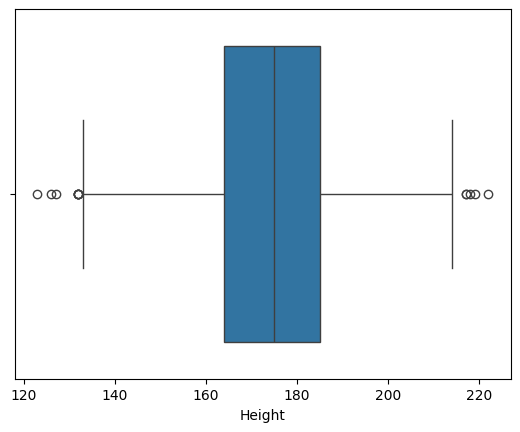

In [71]:
sns.boxplot(df['Height'],orient='h')

In [72]:
z_scores = (df['Height'] - df['Height'].mean()) / df['Height'].std()
df = df[z_scores.abs() <= 3]

<Axes: ylabel='Height'>

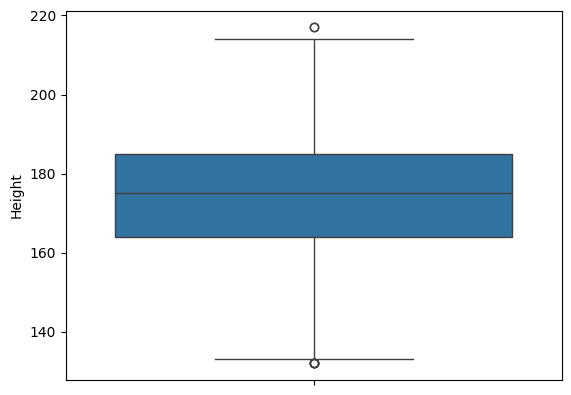

In [73]:
sns.boxplot(df['Height'],orient='v')

In [74]:
df.isnull().sum()

User_ID        0
Gender        49
Age            0
Height         0
Weight         0
Duration       0
Heart_Rate     0
Body_Temp      0
Calories       0
dtype: int64

# Fill Null Values

In [75]:
df['Gender'].fillna(statistics.mode(df['Gender']), inplace=True)

In [76]:
df.isnull().sum().sum()

0

# Label Encoding

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
df['Gender'].value_counts()

Gender
female    7386
male      7239
Name: count, dtype: int64

In [79]:
df['Gender']=le.fit_transform(df['Gender'])

In [80]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,0,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,0,34,179,71,13,100,40.5,71
4,17771927,0,27,154,58,10,81,39.8,35


In [81]:
df['Gender'].value_counts()

Gender
0    7386
1    7239
Name: count, dtype: int64

# Dependent and Independent Data

In [82]:
X=df.drop('Calories',axis=1)
y=df[['Calories']]

In [83]:
print("shape of X ",X.shape)
print("shape of y ",y.shape)

shape of X  (14625, 8)
shape of y  (14625, 1)


# Split Train and Test Data

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=51)

In [85]:
print("shape of X_train",X_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_train ",y_train.shape)
print("shape of y_test ",y_test.shape)

shape of X_train (10237, 8)
shape of X_test  (4388, 8)
shape of y_train  (10237, 1)
shape of y_test  (4388, 1)


## Linear Regression Model

In [86]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [87]:
lr.fit(X_train,y_train)

LinearRegression()

In [88]:
lr.score(X_test,y_test)

0.9667843242113731

# Evaluation Metrics

In [89]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [90]:
y_pred=lr.predict(X_test)

In [91]:
y_test

,Calories
253,29
14146,23
12894,34
13756,24
14677,223
...,...
870,8
3670,80
9992,75
1229,7


In [92]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  126.07918106364228


In [93]:
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error=  8.361097544201483


In [94]:
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error=  11.228498611285584


In [95]:
print("R2 Score = ",r2_score(y_test,y_pred))

R2 Score =  0.9667843242113731


# Decision Tree Regression

In [96]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='squared_error')

In [97]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [98]:
regressor.score(X_test,y_test)

0.9915118732438142

# Random Forest Regression

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,criterion = 'squared_error')

In [100]:
rf.fit(X_train,y_train)

<ipython-input-100-d6d9475b85dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor(n_estimators=70)

In [101]:
rf.score(X_test,y_test)

0.9975068026890955

# Evaluation Metrics

In [102]:
y_pred=rf.predict(X_test)

In [103]:
y_test

,Calories
253,29
14146,23
12894,34
13756,24
14677,223
...,...
870,8
3670,80
9992,75
1229,7


In [104]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  9.463612216992539


In [105]:
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error=  1.9664702435212917


In [106]:
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error=  3.076298460324118


In [107]:
print("R2 Score = ",r2_score(y_test,y_pred))

R2 Score =  0.9975068026890955


# KNN Regression

In [108]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=2)

In [109]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [110]:
knn.score(X_test,y_test)

-0.5434031930867154

# Regulation L1 & L2

In [111]:
from sklearn.linear_model import Ridge,Lasso

In [112]:
rd=Ridge()
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

0.9667839419823793

In [113]:
la=Lasso()
la.fit(X_train,y_train)
la.score(X_test,y_test)

0.9627131626035521

In [114]:
rd2=Ridge(alpha=2)
rd2.fit(X_train,y_train)
rd2.score(X_test,y_test)

0.9667835412540229

In [115]:
ls2=Lasso(alpha=4)
ls2.fit(X_train,y_train)
ls2.score(X_test,y_test)

0.9598068623092963

# K Fold

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
score_rf=cross_val_score(RandomForestRegressor(n_estimators=50),X_train,y_train,cv=3)
print(score_rf)
print("avg",np.average(score_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.99649773 0.99678198 0.99673154]
avg 0.9966704175477302


In [118]:
score_dt=cross_val_score(DecisionTreeRegressor(criterion='squared_error'),X_train,y_train,cv=2)
print(score_dt)
print("avg",np.average(score_dt))


[0.98716949 0.98819506]
avg 0.9876822790080102
